In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statistics as st
from astropy.io import ascii
import sys
import imp
from tqdm import tqdm
sys.path.insert(0, '/Users/H/INVERSE/Python/')

import freedrift
imp.reload(freedrift)
# from scipy.io import FortranFile
# import struct

<module 'freedrift' from '/Users/H/INVERSE/Python/freedrift.py'>

In [89]:
location =  % pwd
location

'/Users/H/INVERSE/Code_dev/NA_i_o/NA_4d_scaled_ranges/Imposed_all'

In [111]:
# constants
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 
fc   = 1.46e-4 
nbals = 5
hice = np.ndarray([nbals])
hifc = np.ndarray([nbals])
hice[0] = 1.0e-0
hifc[0] = hice[0]*fc
hice[1] = 1.0e-0
hifc[1] = hice[1]*fc
hice[2] = 0.9e-0
hifc[2] = hice[2]*fc
hice[3] = 0.9e-0
hifc[3] = hice[3]*fc
hice[4] = 1.0e-0
hifc[4] = hice[4]*fc

In [112]:
# changing to dimensional errors
wind_mag = np.ndarray([nbals])
wind_ang = np.ndarray([nbals])
wind_sig = np.ndarray([nbals])
uwind = np.ndarray([nbals])
vwind = np.ndarray([nbals])
ice_mag = np.ndarray([nbals])
ice_ang = np.ndarray([nbals])
ice_sig = np.ndarray([nbals])
uice = np.ndarray([nbals])
vice = np.ndarray([nbals])
ocn_mag = np.ndarray([nbals])
ocn_ang = np.ndarray([nbals])
ocn_sig = np.ndarray([nbals])
uocn = np.ndarray([nbals])
vocn = np.ndarray([nbals])
# set up wind and ocean
wind_mag[0] = 1.1
wind_ang[0] = np.deg2rad(0)
wind_sig[0] = 0.1*wind_mag[0]
uwind[0]    = wind_mag[0]*np.cos(wind_ang[0])
vwind[0]    = wind_mag[0]*np.sin(wind_ang[0])
ocn_mag[0]  = 0.1
ocn_ang[0]  = np.deg2rad(10)
ocn_sig[0] = 0.01*ocn_mag[0]  
uocn[0]     = ocn_mag[0]*np.cos(ocn_ang[0])
vocn[0]     = ocn_mag[0]*np.sin(ocn_ang[0])

wind_mag[1] = 2.1
wind_ang[1] = np.deg2rad(15)
wind_sig[1] = 0.1*wind_mag[1]
uwind[1]    = wind_mag[1]*np.cos(wind_ang[1])
vwind[1]    = wind_mag[1]*np.sin(wind_ang[1])
ocn_mag[1]  = 0.02
ocn_ang[1]  = np.deg2rad(-49)
ocn_sig[1] = 0.01*ocn_mag[1]
uocn[1]     = ocn_mag[1]*np.cos(ocn_ang[1])
vocn[1]     = ocn_mag[1]*np.sin(ocn_ang[1])

wind_mag[2] = 0.6
wind_ang[2] = np.deg2rad(110)
wind_sig[2] = 0.1*wind_mag[2]
uwind[2]    = wind_mag[2]*np.cos(wind_ang[2])
vwind[2]    = wind_mag[2]*np.sin(wind_ang[2])
ocn_mag[2]  = 0.06
ocn_ang[2]  = np.deg2rad(63)
ocn_sig[2] = 0.01*ocn_mag[2]
uocn[2]     = ocn_mag[2]*np.cos(ocn_ang[2])
vocn[2]     = ocn_mag[2]*np.sin(ocn_ang[2])

wind_mag[3] = 0.5
wind_ang[3] = np.deg2rad(12)
wind_sig[3] = 0.1*wind_mag[3]
uwind[3]    = wind_mag[3]*np.cos(wind_ang[3])
vwind[3]    = wind_mag[3]*np.sin(wind_ang[3])
ocn_mag[3]  = 0.03
ocn_ang[3]  = np.deg2rad(135)
ocn_sig[3] = 0.01*ocn_mag[3]
uocn[3]     = ocn_mag[3]*np.cos(ocn_ang[3])
vocn[3]     = ocn_mag[3]*np.sin(ocn_ang[3])

wind_mag[4] = 4.0
wind_ang[4] = np.deg2rad(1)
wind_sig[4] = 0.1*wind_mag[4]
uwind[4]    = wind_mag[4]*np.cos(wind_ang[4])
vwind[4]    = wind_mag[4]*np.sin(wind_ang[4])
ocn_mag[4]  = 0.001
ocn_ang[4]  = np.deg2rad(-114)
ocn_sig[4] = 0.1*ocn_mag[4]
uocn[4]     = ocn_mag[4]*np.cos(ocn_ang[4])
vocn[4]     = ocn_mag[4]*np.sin(ocn_ang[4])

# Ca_min = 1.0e-6
# Ca_max = 2.0e-3
# Co_min = 1.0e-3
# Co_max = 6.0e-2

# going to pass N2a and rop ranges directly now

Ca     = 5e-4
ThetaA = np.deg2rad(10)
Co     = 5e-3
ThetaO = np.deg2rad(0) # original

# invert for thO and thA-thO
# these replace for thO
thA_min = ThetaO - np.deg2rad(15)
thA_max = ThetaO + np.deg2rad(15)
# these replace for thA-thO
thO_min = (ThetaA - ThetaO) - np.deg2rad(15)
thO_max = (ThetaA - ThetaO) + np.deg2rad(15)

nansen_use = freedrift.nansen(Ca,Co)**2
rossby_use = freedrift.rossby_pp(Co)
n2a_min = nansen_use*1e-1
n2a_max = nansen_use*2e0
rop_min = rossby_use*1e-1
rop_max = rossby_use*2e0
print(n2a_min, np.sqrt(nansen_use), nansen_use, n2a_max)
print(rop_min, rossby_use, rop_max)

1.21832358674e-05 0.0110377696422 0.000121832358674 0.000243664717349
17.87524366471735 178.75243664717348 357.50487329434696


1.1 0.101304484176 0.1 0.0173648177667 0.0157861979697
2.1 0.0374461589094 0.02 -0.0150941916045 -0.00718771028784
0.6 0.0612307906305 0.06 0.0534603914513 0.0891006524188
0.5 0.0287818931301 0.03 0.0212132034356 0.0424264068712
4.0 0.0379132515413 0.001 -0.000913545457643 -0.000228386364411
0.11 -2.31584178475e+77 0.001
0.21 -1.29073916445e-231 0.0002
0.06 2.17584221274e-314 0.0006
0.05 2.18528237098e-314 0.0003
0.4 2.1801140807e-314 0.0001


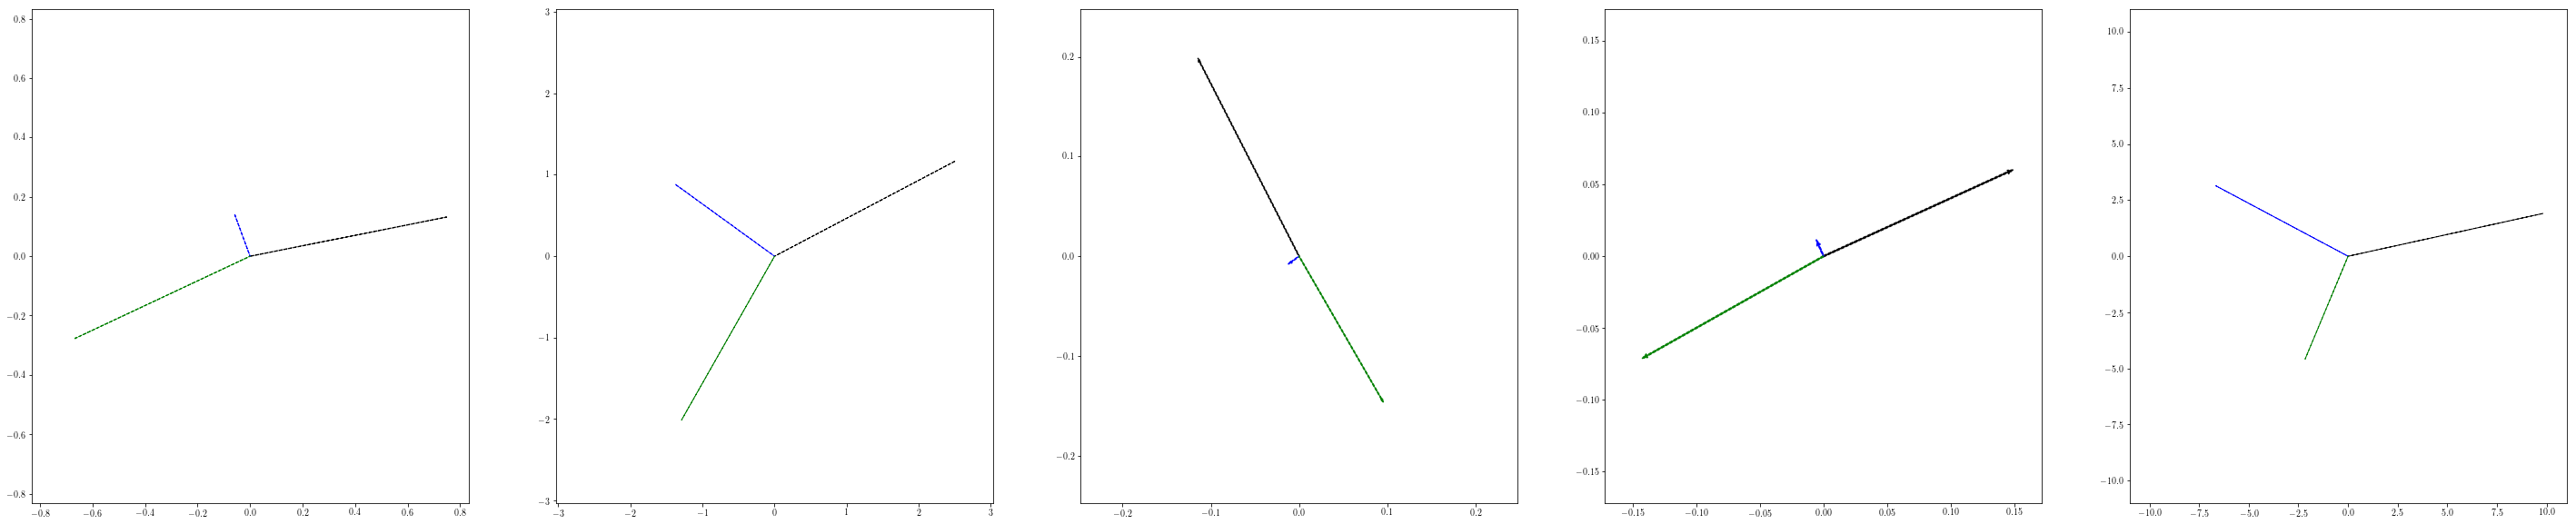

In [113]:
ice_ocn_mag = np.ndarray([nbals])
na2 = np.ndarray([nbals])
rop = np.ndarray([nbals])
thA = np.ndarray([nbals])
thO = np.ndarray([nbals])
i_o_mag = np.ndarray([nbals])
i_o_sig = np.ndarray([nbals])
ui_o = np.ndarray([nbals])
vi_o = np.ndarray([nbals])
sig_c = 0.1 # plus/minus lever for random error
# problem 1

for i in range(nbals):
    Na2 = freedrift.nansen(Ca,Co)**2*np.random.normal(loc=1.0,scale=sig_c)
    RoP = freedrift.rossby_pp(Co)*hifc[i]*np.random.normal(loc=1.0,scale=sig_c)
    ThA = ThetaA*np.random.normal(loc=1.0,scale=sig_c)
    ThO = ThetaO*np.random.normal(loc=1.0,scale=sig_c)
    uice[i],vice[i] = freedrift.ice_mag(uwind[i],vwind[i],uocn[i],vocn[i],
                 Na2,RoP,ThA,ThO)
    ice_mag[i]     = np.hypot(uice[i],vice[i])
    ui_o[i] = uice[i] - uocn[i]
    vi_o[i] = vice[i] - vocn[i]
    i_o_mag[i]     = np.hypot(ui_o[i],vi_o[i])
i_o_sig[0] = 0.1*i_o_mag[0]
i_o_sig[1] = 0.1*i_o_mag[1]
i_o_sig[2] = 0.1*i_o_mag[2]
i_o_sig[3] = 0.1*i_o_mag[3]
i_o_sig[4] = 0.1*i_o_mag[4]
[print(wind_mag[i],ice_mag[i],ocn_mag[i],ice_ocn_mag[i],ice_ocn_mag[i]/wind_mag[i])  for i in range(nbals)];
[print(wind_sig[i],ice_sig[i],ocn_sig[i])  for i in range(nbals)];

# disassemble forces
# forcing_1
orig_forces = np.empty([nbals,6])
# for j in tqdm(data_NA['number']-1):
for i in range(nbals):
    orig_forces[i,:] = freedrift.force_bal(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          rhoa*Ca,rhoo*Co,rhoi*hifc[i],
                          ThetaA,ThetaO)

force_magw = np.empty([nbals])
for i in range(nbals):
    force_magw[i] = np.max(np.hypot(orig_forces[i,0],orig_forces[i,1]))

wnd_scale = 1100
force_scale = 1000
plt.figure(figsize=[10*nbals,10])
# plt.figure(figsize=[10,10])
for nb in range(nbals):
# for nb in range(3,4):
    plt.subplot(1,nbals,nb+1)
#     plt.subplot(1,1,1)
    #   calculated vectors
#     for j in tqdm(range(0,data_NA['number'][-1],10)):
#         plt.arrow(0,0,wnd_scale*orig_vecs[j,nb,0],wnd_scale*orig_vecs[j,nb,1],
#                    alpha=0.009,color='k')
#         plt.arrow(0,0,orig_vecs[j,nb,2],orig_vecs[j,nb,3],
#                    alpha=0.009,color='b')
#         plt.arrow(0,0,orig_vecs[j,nb,4],orig_vecs[j,nb,5],
#                    alpha=0.009,color='g')
    plt.arrow(0,0,force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1],
               linestyle='dashed',color='k')
    plt.arrow(0,0,force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
               linestyle='dashed',color='b')
    plt.arrow(0,0,force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5],
               linestyle='dashed',color='g')
    #   original vectors
#     plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],color='k')
#     plt.arrow(0,0,-ui_o[nb],-vi_o[nb],color='b')
    plt.xlim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.ylim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
#     plt.ylim([1.1*np.min(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],-0.02))),
#         1.1*np.max(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],0.02)))]) 
plt.show()

In [114]:
i=4
freedrift.wnd_i_o_mag(ui_o[i],vi_o[i],100*Na2,0.1*RoP,np.deg2rad(120),np.deg2rad(-10)),uwind[i],vwind[i]
# freedrift.i_o_mag(uwind[i],vwind[i],100*Na2,0.01*RoP,np.deg2rad(120),np.deg2rad(0)),ui_o[i],vi_o[i]

its =  5


((-0.31488942560544381, -0.17315643776880887),
 3.9993907806255651,
 0.069809625749134047)

In [115]:
np.hypot(orig_forces[:,4],orig_forces[:,5])

array([ 0.00071872,  0.00238684,  0.00017049,  0.00015514,  0.00507122])

In [116]:
print(uwind[0])
for i in range(nbals):
    uwind[i] = uwind[i]+np.random.normal(loc=0,scale=wind_sig[i])
    vwind[i] = vwind[i]+np.random.normal(loc=0,scale=wind_sig[i])
    wind_mag[i]     = np.hypot(uwind[i],vwind[i])
    ui_o[i] = ui_o[i]+np.random.normal(loc=0,scale=i_o_sig[i])
    vi_o[i] = vi_o[i]+np.random.normal(loc=0,scale=i_o_sig[i])
    i_o_mag[i]     = np.hypot(ui_o[i],vi_o[i])
print(uwind[0])

# try some scaling factors
Na2_scale = 0.010**2
beta_a = np.ndarray([nbals])
beta_i = np.ndarray([nbals])
beta_w = np.ndarray([nbals])
beta_fb= np.ndarray([nbals])
for i in range(nbals):
    beta_a[i] = i_o_mag[i]**-2*Na2_scale**3
    beta_i[i] = wind_mag[i]**-2*Na2_scale
    beta_w[i] = wind_mag[i]**-2*Na2_scale
    beta_fb[i]= wind_mag[i]**-4

# ### try some scaling factors
# Na2_scale = 0.015**2
# beta_a = np.ndarray([nbals])
# beta_i = np.ndarray([nbals])
# beta_w = np.ndarray([nbals])
# beta_fb= np.ndarray([nbals])
for i in range(nbals):
    beta_a[i] = 1.0 # ice_ocn_mag[i]**-2*Na2_scale**3
    beta_i[i] = 1.0 # iwind_mag[i]**-2*Na2_scale
    beta_w[i] = 1.0 # iwind_mag[i]**-2*Na2_scale
    beta_fb[i]= 1.0 # iwind_mag[i]**-4

# aggregate errors - bad winds mean bad everything
wind_sig_use = np.ndarray([nbals])
i_o_sig_use = np.ndarray([nbals])
for i in range(nbals):
    wind_sig_use[i] = wind_sig[i]
    i_o_sig_use[i] = np.maximum(wind_sig[i]/wind_mag[i],i_o_sig[i]/i_o_mag[i])*i_o_mag[i]

1.1
1.10905911087


In [117]:
its = 15
it1 = 200
itn = 150
res = 35

# open na.in
# Open file
f = open(location+'/na.in', 'r')

# Read and ignore header lines
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()

# Loop over lines and extract variables of interest
# read p1
columns1 = f.readline()
var = columns1.split()[0]
c1_len = len(var)
# its = int(var)
# read p2
columns2 = f.readline()
var = columns2.split()[0]
c2_len = len(var)
# it1 = int(var)
# read p3
columns3 = f.readline()
var = columns3.split()[0]
c3_len = len(var)
# itn = int(var)
# read p4
columns4 = f.readline()
var = columns4.split()[0]
c4_len = len(var)
# res = int(var)

tail1 = f.readline()
tail2 = f.readline()
tail3 = f.readline()
tail4 = f.readline()
tail5 = f.readline()

f.close()
# print(its,it1,itn,res)

# write na.in
# Open file
f = open(location+'/na.in', 'w')

# write and ignore header lines
f.writelines(header1)
f.writelines(header2)
f.writelines(header3)
f.writelines(header4)

# write its
f.writelines(str(its)+columns1[c1_len:-1]+'\n')
# write it1
f.writelines(str(it1)+columns2[c2_len:-1]+'\n')
# write it1
f.writelines(str(itn)+columns3[c3_len:-1]+'\n')
# write it1
f.writelines(str(res)+columns4[c4_len:-1]+'\n')

f.writelines(tail1)
f.writelines(tail2)
f.writelines(tail3)
f.writelines(tail4)
f.writelines(tail5)

f.close()

In [118]:
# write freedrift_IC
data_in = np.ndarray([nbals*12+12],dtype='float32')
r = 0;
data_in[r] = nbals;r+=1
# wind data
data_in[r:r+nbals] = uwind;r+=nbals
data_in[r:r+nbals] = vwind;r+=nbals
data_in[r:r+nbals] = wind_mag;r+=nbals
data_in[r:r+nbals] = wind_sig_use;r+=nbals
# i_o data
data_in[r:r+nbals] = ui_o;r+=nbals
data_in[r:r+nbals] = vi_o;r+=nbals
data_in[r:r+nbals] = i_o_mag;r+=nbals
data_in[r:r+nbals] = i_o_sig_use;r+=nbals
# scaling betas
data_in[r:r+nbals] = beta_a ;r+=nbals
data_in[r:r+nbals] = beta_i ;r+=nbals
data_in[r:r+nbals] = beta_fb;r+=nbals
# other data/constants
data_in[r:r+nbals] = hifc;r+=nbals
data_in[r] = rhoa ;r+=1
data_in[r] = rhoi ;r+=1
data_in[r] = rhoo ;r+=1
# special for range
data_in[r] = n2a_min;r+=1
data_in[r] = n2a_max;r+=1
data_in[r] = rop_min;r+=1
data_in[r] = rop_max;r+=1
data_in[r] = thA_min;r+=1
data_in[r] = thA_max;r+=1
data_in[r] = thO_min;r+=1
data_in[r] = thO_max;r+=1
f = open(location+'/freedrift_IC','wb')
data_in.tofile(f,sep=' ')
f.close()

In [119]:
# now run the model - freedrift_na
! bin/freedrift_na 

# convert output to ascii nad2asc
! ./nad2asc na.nad na.asc

# read output
data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                     names=['number','Na','Ro','thO','thA-O','misfit'])

##### filter misfits
misfit_min = data_NA['misfit'][0]
misfit_max = data_NA['misfit'][0]
misfit_min_no = 0
for i in data_NA['number'][0:-1]:
    if data_NA['misfit'][i] < misfit_min:
        misfit_min = data_NA['misfit'][i]
        misfit_min_no = i
    if data_NA['misfit'][i] > misfit_max:
        misfit_max = data_NA['misfit'][i]
misfit_range = np.mean(data_NA['misfit'][0:it1])/misfit_min
misfit_cut = misfit_min * (1.0 + misfit_range *  1e-1) 
# number_cut = int(3*data_NA['number'][-1]/4)
number_cut = 0
data_NA_cut = np.empty([6,data_NA['number'][-1]])
#
i_cut = -1
for i in data_NA['number'][number_cut:-1]:
    if data_NA['misfit'][i] < misfit_cut:
        i_cut += 1
        data_NA_cut[0,i_cut] = data_NA['number'][i]
        data_NA_cut[1,i_cut] = data_NA['Na'][i]
        data_NA_cut[2,i_cut] = data_NA['Ro'][i]
        data_NA_cut[3,i_cut] = data_NA['thO'][i]
        data_NA_cut[4,i_cut] = data_NA['thA-O'][i]
        data_NA_cut[5,i_cut] = data_NA['misfit'][i]
print(i_cut, misfit_min_no,np.mean(data_NA_cut[5,0:i_cut+1]))


  User routines output

  Opening freedrift files...

 Number of balances this time  =    5.00000000               5

  Successfuly read  freedrift files...


  Imposed Parameter space

  nd = 4, Ca, thetaA, Co, thetaO

  Adjusted Parameter space

  nd = 4, Na, Ro,  thetaA, thetaO

  Adjusted Parameter space 2

  nd = 4, Na2, Ro_p,  thetaO, thetaA - thetaOO

  Now invert            5  problems with same parameters
  Problem            1
  Wind_mag =    1.11398196    
  I_O_mag  =    5.63904271E-03
  Problem            2
  Wind_mag =    1.99525988    
  I_O_mag  =    1.78520530E-02
  Problem            3
  Wind_mag =   0.525206029    
  I_O_mag  =    1.22037088E-03
  Problem            4
  Wind_mag =   0.446029216    
  I_O_mag  =    1.21404801E-03
  Problem            5
  Wind_mag =    3.66839743    
  I_O_mag  =    3.96279432E-02

 -----------------------------------
 |                                 |
 |     Parameter space search      |
 | using a Neighbourhood Algorithm |
 |     

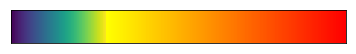

In [120]:
big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.xticks([])
plt.yticks([])
plt.show()

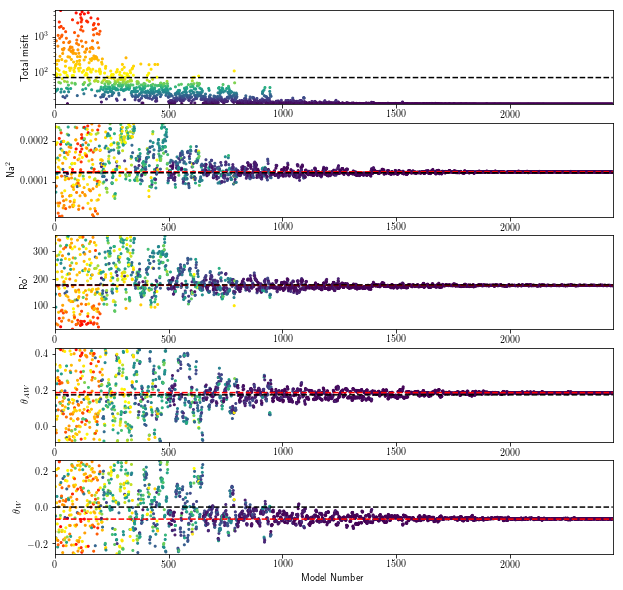

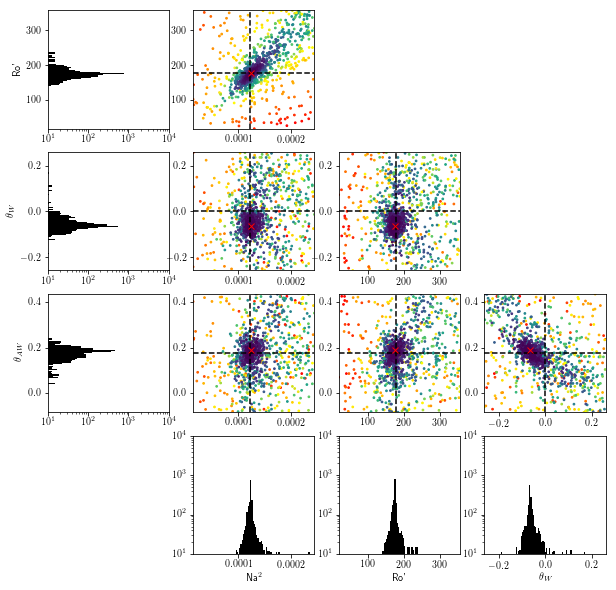

In [124]:
# plot misfit
# cmin = 1e-10
# cmax = 1e2
plt.figure(figsize=[10,10])
plt.subplot(5,1,1)
cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
cmax = np.max(data_NA['misfit'])
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')

plt.subplot(5,1,2)
plt.scatter(data_NA['number'],data_NA['Na'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Na'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[nansen_use for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'Na$^2$')
# plt.savefig('misfit_all_100%.pdf')
plt.subplot(5,1,3)
plt.scatter(data_NA['number'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Ro'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[rossby_use for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro\'')
plt.subplot(5,1,4)
plt.scatter(data_NA['number'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thA-O'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[ThetaA-ThetaO for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{AW}$')
plt.subplot(5,1,5)
plt.scatter(data_NA['number'],data_NA['thO'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thO'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[ThetaO for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{W}$')
plt.xlabel('Model Number')
plt.show()
# plot trade off
th1 = ThetaO
th2 = ThetaA - ThetaO
# x - Na y - Ro
plt.figure(figsize=[10,10])
cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# horizontal hists
plt.subplot(4,4,1)
plt.hist(data_NA['Ro'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel('Ro\'')
plt.subplot(4,4,5)
plt.hist(data_NA['thO'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{W}$')
plt.subplot(4,4,9)
plt.hist(data_NA['thA-O'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{AW}$')
# x - Na y - Ro
plt.subplot(4,4,2)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('Ro')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*rossby_use for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['Ro']),np.max(data_NA['Ro'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
# x - Na y - thA
plt.subplot(4,4,6)
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thO')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Ro y - thA
plt.subplot(4,4,7)
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Na y - thO
plt.subplot(4,4,10)
plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thA-O')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - Ro y - thO
plt.subplot(4,4,11)
plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - thA y - thO
plt.subplot(4,4,12)
plt.scatter(data_NA['thO'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['thO']),np.max(data_NA['thO'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['thO'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# bottom row histograms
plt.subplot(4,4,14)
plt.hist(data_NA['Na'],bins=100,color='k')
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'Na$^2$')
plt.subplot(4,4,15)
plt.hist(data_NA['Ro'],bins=100,color='k')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel('Ro\'')
plt.subplot(4,4,16)
plt.hist(data_NA['thO'],bins=100,color='k')
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'$\theta_{W}$')
plt.show()
# plt.savefig('trade_off_all_100%.pdf')

In [100]:
# want the medain of all from data_NA_cut
# first Na2
nansen_calc = st.median(data_NA_cut[1,0:i_cut])
rossby_calc = st.median(data_NA_cut[2,0:i_cut])
thO_calc    = st.median(data_NA_cut[3,0:i_cut])
thA_O_calc  = st.median(data_NA_cut[4,0:i_cut])
print('Nansen set',np.sqrt(nansen_use),'and calculated',np.sqrt(data_NA['Na'][misfit_min_no]),np.sqrt(nansen_calc))
print('Rossby set',rossby_use,'and calculated',data_NA['Ro'][misfit_min_no],rossby_calc)
print('ThetaA set',np.rad2deg(ThetaA),'and calculated',
      np.rad2deg(data_NA['thA-O'][misfit_min_no]+data_NA['thO'][misfit_min_no]),np.rad2deg(thA_O_calc + thO_calc))
print('ThetaO set',np.rad2deg(ThetaO),'and calculated',np.rad2deg(data_NA['thO'][misfit_min_no]),np.rad2deg(thO_calc))
print('ThetaA - O set',np.rad2deg(ThetaA - ThetaO),'and calculated',np.rad2deg(data_NA['thA-O'][misfit_min_no]),np.rad2deg(thA_O_calc))
print('Ca calculated',(data_NA['Na'][misfit_min_no]/data_NA['Ro'][misfit_min_no])*(rhoi/rhoa))
print('Co calculated',(rhoi/rhoo)/data_NA['Ro'][misfit_min_no])
print('Ca calculated',(nansen_calc/rossby_calc*(rhoi/rhoa)))
print('Co calculated',(rhoi/rhoo)/rossby_calc)

Nansen set 0.0110377696422 and calculated 0.0109227316638 0.0109110204839
Rossby set 178.75243664717348 and calculated 169.316147 168.713699
ThetaA set 10.0 and calculated 14.7232155656 14.7309865578
ThetaO set 0.0 and calculated -1.08017904808 -0.886189725081
ThetaA - O set 10.0 and calculated 15.8033946136 15.6171762828
Ca calculated 0.000516920165631
Co calculated 0.00527865888205
Ca calculated 0.000517654170838
Co calculated 0.00529750807749


In [1]:
# disassemble vectors
# forcing_1
all_vecs = np.empty([data_NA['number'][-1],nbals,4])
fb_ratio =[ np.mean([wind_sig[i], ice_sig[i], ocn_sig[i]]) for i in range(nbals)]
# for j in tqdm(data_NA['number']-1):
for j in range(misfit_min_no,misfit_min_no+1):
    for i in range(nbals):
#         all_vecs[j,i,0],all_vecs[j,i,1] = freedrift.wnd_i_o_mag(
#                           ui_o[i],vi_o[i],
#                           data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#         all_vecs[j,i,2],all_vecs[j,i,3] = freedrift.i_o_mag(
#                           uwind[i],vwind[i],
#                           data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
        all_vecs[j,i,0],all_vecs[j,i,1] = freedrift.wnd_i_o_mag(
                          ui_o[i],vi_o[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j],0)
        all_vecs[j,i,2],all_vecs[j,i,3] = freedrift.i_o_mag(
                          uwind[i],vwind[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j],0)

NameError: name 'np' is not defined

In [102]:
# disassemble forces
# forcing_1
all_forces = np.empty([data_NA['number'][-1],nbals,6])
# for j in tqdm(data_NA['number']-1):
# for j in range(data_NA['number'][-1]-10,data_NA['number'][-1]-1):
# for j in tqdm(data_NA['number']-1):
for j in range(misfit_min_no-1,misfit_min_no+1):
    for i in range(nbals):
        all_forces[j,i,:] = freedrift.force_bal(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])

#         all_forces[j,i,:] = freedrift.force_bal(
#                           all_vecs[j,i,0],all_vecs[j,i,1],all_vecs[j,i,2],all_vecs[j,i,3],
#                           data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])

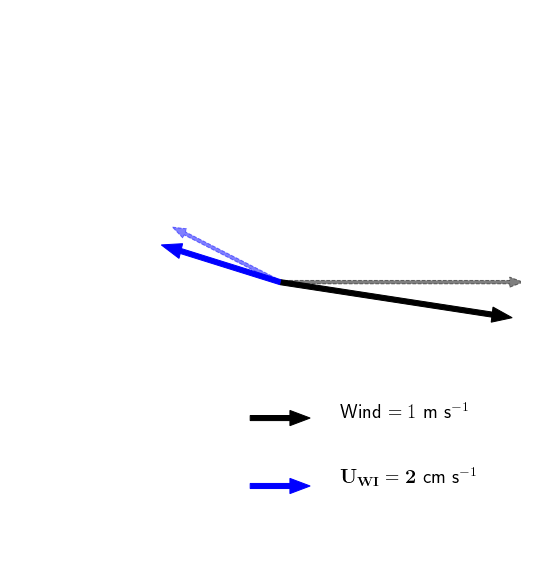

In [107]:
wnd_range = np.max(wind_mag)
wnd_range = 0.99*np.max(np.maximum(all_vecs[misfit_min_no,:,0:2],wnd_range))
wnd_scale = 0.02
plt.figure(figsize=[10*nbals,10])
plt.rc('text', usetex=True)
for nb in range(0,4):
# for nb in range(nbals):
    ax = plt.subplot(1,nbals,nb+1)
    #   calculated vectors
#     for j in tqdm(range(0,data_NA['number'][-1],10)):
#         plt.arrow(0,0,wnd_scale*all_vecs[j,nb,0],wnd_scale*all_vecs[j,nb,1],
#                    alpha=0.009,color='k')
#         plt.arrow(0,0,all_vecs[j,nb,2],all_vecs[j,nb,3],
#                    alpha=0.009,color='b')
#         plt.arrow(0,0,all_vecs[j,nb,4],all_vecs[j,nb,5],
#                    alpha=0.009,color='g')
    plt.arrow(0,0,wnd_scale*all_vecs[misfit_min_no,nb,0],wnd_scale*all_vecs[misfit_min_no,nb,1],
               length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.5)
    plt.arrow(0,0,-all_vecs[misfit_min_no,nb,2],-all_vecs[misfit_min_no,nb,3],
               length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.5)
#     plt.arrow(0,0,all_vecs[misfit_min_no,nb,4],all_vecs[misfit_min_no,nb,5],
#                linestyle='dashed',color='g')
    #   original vectors
    plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],
              color='k',length_includes_head = 'true',width=0.0015)
    plt.arrow(0,0,-ui_o[nb],-vi_o[nb],
              color='b',length_includes_head = 'true',width=0.0015)
    plt.xlim([-wind_mag[nb]*wnd_scale,wind_mag[nb]*wnd_scale])
    plt.ylim([-wind_mag[nb]*wnd_scale,wind_mag[nb]*wnd_scale])
    plt.xlim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
    plt.ylim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
#     plt.arrow(-wnd_scale/2,-wind_mag[nb]*wnd_scale/2,wnd_scale,0,
#               color='k',length_includes_head = 'true',width=0.0015)
#     plt.arrow(-wnd_scale/2,-3*wind_mag[nb]*wnd_scale/4,wnd_scale,0,
# #               color='b',length_includes_head = 'true',width=0.0015)
#     plt.arrow(-wnd_scale/2,-wnd_range*wnd_scale/2,wnd_scale,0,
#               color='k',length_includes_head = 'true',width=0.0015)
#     plt.arrow(-wnd_scale/2,-3*wnd_range*wnd_scale/4,wnd_scale,0,
#               color='b',length_includes_head = 'true',width=0.0015)
#     plt.text(wnd_scale,-wind_mag[nb]*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-3*wind_mag[nb]*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
    plt.text(wnd_scale,-wnd_range*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
    plt.text(wnd_scale,-3*wnd_range*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
    ax.axis('off')
plt.show()

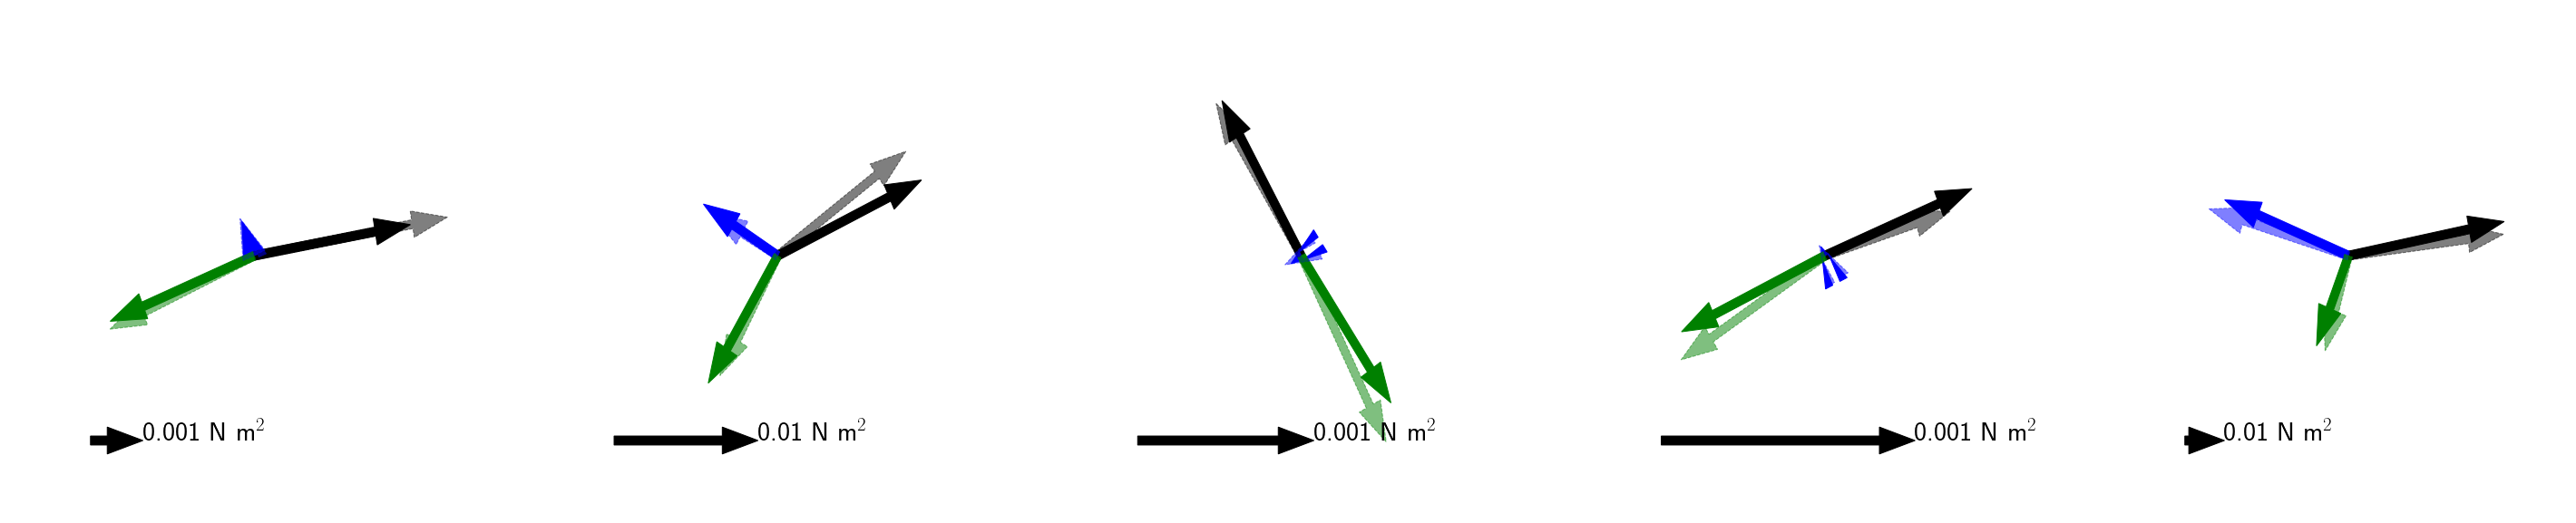

In [104]:
leg_len = np.ndarray([nbals])
for i in range(nbals):
    leg_len[i] = 10.0**np.ceil(np.log10((np.hypot(all_forces[misfit_min_no,i,0],all_forces[misfit_min_no,i,1]))))
leg_len

wnd_scale = 55
force_scale = 40
plt.figure(figsize=[10*nbals,10])
# plt.figure(figsize=[10,10])
for nb in range(0,5):
   
    ax = plt.subplot(1,nbals,nb+1)
#     plt.subplot(1,1,1)

    plt.arrow(0,0,force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1],
               color='k',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
               color='b',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5],
               color='g',width = force_magw[nb]*2,length_includes_head = 'true')

    plt.arrow(0,0,force_scale*all_forces[misfit_min_no,nb,0],force_scale*all_forces[misfit_min_no,nb,1],
               linestyle='dashed',color='k',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*all_forces[misfit_min_no,nb,2],force_scale*all_forces[misfit_min_no,nb,3],
               linestyle='dashed',color='b',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*all_forces[misfit_min_no,nb,4],force_scale*all_forces[misfit_min_no,nb,5],
               linestyle='dashed',color='g',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
#     #   original vectors
#     plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],color='k')
#     plt.arrow(0,0,-ui_o[nb],-vi_o[nb],color='b')
    plt.xlim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.ylim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.arrow(-3*wnd_scale*force_magw[nb]/4,-3*wnd_scale*force_magw[nb]/4,leg_len[nb]*1e1,0,
              color='k',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.text(-3*wnd_scale*force_magw[nb]/4+leg_len[nb]*1e1,-3*wnd_scale*force_magw[nb]/4,
             str(leg_len[nb])+' N m$^2$',fontsize=30,horizontalalignment='left')
#     plt.ylim([1.1*np.min(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],-0.02))),
#         1.1*np.max(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],0.02)))]) 
    ax.axis('off')
plt.show()

In [ ]:
# plot trade off
th1 = ThetaO
th2 = ThetaA - ThetaO
# x - Na y - Ro
plt.figure(figsize=[10,10])
cmin = np.min(data_NA_cut[5,0:i_cut])
# cmin = 1e-3
# cmax = np.max(data_NA_cut[5,0:i_cut])
cmax = misfit_cut
# x - Na y - Ro
plt.subplot(3,3,1)
plt.scatter(data_NA_cut[1,0:i_cut],data_NA_cut[2,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
# plt.xlim([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])])
# plt.ylim([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])])
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro')
plt.plot([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])],[i*rossby_use for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')

# x - Na y - thA
plt.subplot(3,3,4)
plt.scatter(data_NA_cut[1,0:i_cut],data_NA_cut[3,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
# plt.xlim([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])])
# plt.ylim([np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])])
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('thO')
plt.plot([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Ro y - thA
plt.subplot(3,3,5)
plt.scatter(data_NA_cut[2,0:i_cut],data_NA_cut[3,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
# plt.xlim([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])])
# plt.ylim([np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])])
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Na y - thO
plt.subplot(3,3,7)
plt.scatter(data_NA_cut[1,0:i_cut],data_NA_cut[4,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
# plt.xlim([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])])
# plt.ylim([np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])])
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('thA-O')
plt.xlabel('Na')
plt.plot([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - Ro y - thO
plt.subplot(3,3,8)
plt.scatter(data_NA_cut[2,0:i_cut],data_NA_cut[4,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
# plt.xlim([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])])
# plt.ylim([np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])])
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.xlabel('Ro')
plt.plot([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - thA y - thO
plt.subplot(3,3,9)
plt.scatter(data_NA_cut[3,0:i_cut],data_NA_cut[4,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
plt.xlim([np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])])
plt.ylim([np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])])
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.xlabel('thO')
plt.plot([np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*th1 for i in [1,1]],[np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])],'--k')
plt.plot(data_NA['thO'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# plt.savefig('trade_off_cut_100%.pdf')
plt.show()

In [ ]:
# disassemble misfits
# forcing_1
all_misfits = np.empty([data_NA['number'][-1],nbals,4])
fb_ratio =[ np.mean([wind_sig_use[i]/wind_mag[i],
                     ice_sig_use[i]/ice_mag[i], ocn_sig_use[i]/ocn_mag[i]]) for i in range(nbals)]
for j in tqdm(data_NA['number']-1):
    for i in range(nbals):
        all_misfits[j,i,0] = freedrift.misfit_a(
                          uwind[i],vwind[i],uice[i],vice[i],uocn[i],vocn[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_a[i]/wind_sig_use[i]**2
        all_misfits[j,i,1] = freedrift.misfit_i(
                          uwind[i],vwind[i],uice[i],vice[i],uocn[i],vocn[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_i[i]/ice_sig_use[i]**2
        all_misfits[j,i,2] = freedrift.misfit_o(
                          uwind[i],vwind[i],uice[i],vice[i],uocn[i],vocn[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_w[i]/ocn_sig_use[i]**2
        all_misfits[j,i,3] = freedrift.misfit_fb(
                          uwind[i],vwind[i],uice[i],vice[i],uocn[i],vocn[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_fb[i]/fb_ratio[i]**2

In [ ]:
# plot misfit
plt.figure(figsize=[10,10])
# cmin = 1e-10
cmax = 1e4
cmin = np.min(data_NA['misfit'])*1e-3
# cmin = 1e-12
cmax = np.max(data_NA['misfit'])*1e1
for i in range(nbals):
    plt.subplot(2,3,i+1)
    plt.scatter(data_NA['number'],all_misfits[:,i,0],alpha = 0.1,c='k',s=4)
    plt.scatter(data_NA['number'],all_misfits[:,i,1],alpha = 0.1,c='b',s=4)
    plt.scatter(data_NA['number'],all_misfits[:,i,2],alpha = 0.1,c='g',s=4)
    plt.scatter(data_NA['number'],all_misfits[:,i,3],alpha = 0.1,c='r',s=4)
    plt.plot(data_NA['number'],[misfit_min for j in range(data_NA['number'][-1])],'--k') 
    plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
    plt.xlim([0,data_NA['number'][-1]])
    plt.yscale('log')
    plt.ylim([cmin,cmax])
    plt.clim(np.log([cmin,cmax]))
plt.show()
# plt.savefig('misfit_sep_100%.pdf')

In [ ]:
# plot misfit
plt.figure(figsize=[10,10])
# cmin = 1e-10
# cmax = 1e0
cmin = np.min(data_NA['misfit'])*1e-2
# cmin = 1e-13
cmax = np.max(data_NA['misfit'])*1e0
plt.subplot(1,1,1)
plt.scatter(data_NA['number'],
            np.sum([all_misfits[:,i,0] for i in range(nbals)],axis=0)
            ,alpha = 0.1,c='k',s=4)
plt.scatter(data_NA['number'],
            np.sum([all_misfits[:,i,1] for i in range(nbals)],axis=0)
            ,alpha = 0.1,c='b',s=4)
plt.scatter(data_NA['number'],
            np.sum([all_misfits[:,i,2] for i in range(nbals)],axis=0)
            ,alpha = 0.1,c='g',s=4)
plt.scatter(data_NA['number'],
            np.sum([all_misfits[:,i,3] for i in range(nbals)],axis=0)
            ,alpha = 0.1,c='r',s=4)
plt.plot(data_NA['number'],[misfit_min for j in range(data_NA['number'][-1])],'--k')
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))

plt.show()
# plt.savefig('misfit_comb_100%.pdf')

In [ ]:
# want the medain of all from data_NA_cut
# first Na2
nansen_calc = np.mean(data_NA_cut[1,0:i_cut])
rossby_calc = np.mean(data_NA_cut[2,0:i_cut])
thO_calc    = np.mean(data_NA_cut[3,0:i_cut])
thA_O_calc  = np.mean(data_NA_cut[4,0:i_cut])
print('Nansen set',np.sqrt(nansen_use),'and calculated',np.sqrt(nansen_calc))
print('Rossby set',rossby_use,'and calculated',rossby_calc)
print('ThetaA set',np.rad2deg(ThetaA),'and calculated',np.rad2deg(thA_O_calc + thO_calc))
print('ThetaO set',np.rad2deg(ThetaO),'and calculated',np.rad2deg(thO_calc))
print('ThetaA - O set',np.rad2deg(ThetaA - ThetaO),'and calculated',np.rad2deg(thA_O_calc))

In [ ]:
plt.figure(figsize=[12,8])
for nb in range(nbals):
    plt.subplot(2,3,nb+1)
#   original vectors
    plt.arrow(0,0,0.1*uwind[nb],0.1*vwind[nb],color='k')
    plt.arrow(0,0,uice[nb],vice[nb],color='b')
    plt.arrow(0,0,uocn[nb],vocn[nb],color='g')
#   calculated vectors
    plt.arrow(0,0,0.1*all_vecs[misfit_min_no,nb,0],0.1*all_vecs[misfit_min_no,nb,1],
               linestyle='dashed',color='k')
    plt.arrow(0,0,all_vecs[misfit_min_no,nb,2],all_vecs[misfit_min_no,nb,3],
               linestyle='dashed',color='b')
    plt.arrow(0,0,all_vecs[misfit_min_no,nb,4],all_vecs[misfit_min_no,nb,5],
               linestyle='dashed',color='g')
    plt.xlim([1.1*np.min(np.hstack((0.1*uwind[nb],uice[nb],uocn[nb],0.1*vwind[nb],vice[nb],vocn[nb],-0.5))),
        1.1*np.max(np.hstack((0.1*uwind[nb],uice[nb],uocn[nb],0.1*vwind[nb],vice[nb],vocn[nb],0.5)))]) 
    plt.ylim([1.1*np.min(np.hstack((0.1*uwind[nb],uice[nb],uocn[nb],0.1*vwind[nb],vice[nb],vocn[nb],-0.5))),
        1.1*np.max(np.hstack((0.1*uwind[nb],uice[nb],uocn[nb],0.1*vwind[nb],vice[nb],vocn[nb],0.5)))]) 
plt.show()

In [ ]:
plt.figure(figsize=[10,10])
for nb in range(nbals):
    plt.subplot(2,3,nb+1)
    #   calculated vectors
    for j in tqdm(data_NA['number']-1):
        plt.arrow(0,0,0.1*all_vecs[j,nb,0],0.1*all_vecs[j,nb,1],
                   alpha=0.005,color='k')
        plt.arrow(0,0,all_vecs[j,nb,2],all_vecs[j,nb,3],
                   alpha=0.005,color='b')
        plt.arrow(0,0,all_vecs[j,nb,4],all_vecs[j,nb,5],
                   alpha=0.005,color='g')
    plt.arrow(0,0,0.1*all_vecs[misfit_min_no,nb,0],0.1*all_vecs[misfit_min_no,nb,1],
               linestyle='dashed',color='k')
    plt.arrow(0,0,all_vecs[misfit_min_no,nb,2],all_vecs[misfit_min_no,nb,3],
               linestyle='dashed',color='b')
    plt.arrow(0,0,all_vecs[misfit_min_no,nb,4],all_vecs[misfit_min_no,nb,5],
               linestyle='dashed',color='g')
    #   original vectors
    plt.arrow(0,0,0.1*uwind[nb],0.1*vwind[nb],color='k')
    plt.arrow(0,0,uice[nb],vice[nb],color='b')
    plt.arrow(0,0,uocn[nb],vocn[nb],color='g')
    plt.xlim([1.1*np.min(np.hstack((0.1*uwind,uice,uocn,-0.05))),
        1.1*np.max(np.hstack((0.1*uwind,uice,uocn,0.05)))]) 
    plt.ylim([1.1*np.min(np.hstack((0.1*vwind,vice,vocn,-0.05))),
        1.1*np.max(np.hstack((0.1*vwind,vice,vocn,0.05)))]) 
plt.show()